In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
import os
current_dir = os.getcwd()
print(current_dir)

C:\Users\Dell\Desktop\MyPython\Yandex.Practica\ПРЕДЛОЖЕНИЯ\Школьники\Работа_над_материалами\Тема_3


In [4]:
import warnings
warnings.filterwarnings('ignore')

## Задача 1

1) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить - кириллица

2) Сформировать новый датасет из отсортированного в алфавитном порядке списка из трёх факторов в количественной шкале: ингредиент_2, ингредиент_1, вес

3) Рассчитать матрицу корреляций для количественных данных. Использовать метод корреляций для случая нормального распределения данных.

In [5]:
PATH_OUT = r'C:\Users\Dell\Desktop\MyPython\Yandex.Practica\ПРЕДЛОЖЕНИЯ\Школьники\Работа_над_материалами\Тема_3'

In [6]:
df = pd.read_csv(PATH_OUT + '\\qq_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df = df.dropna()  # удалили строки с пропусками
df.head(3)

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
0,61.7,2,250.9,2,1,6.3,Годен
1,58.6,2,275.7,1,2,6.7,Брак
2,53.6,2,280.6,2,1,7.5,Брак


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

num = ['вес', 'ингредиент_1', 'ингредиент_2']
num.sort()
df = df[num].corr(method='pearson')
print(df)

                   вес  ингредиент_1  ингредиент_2
вес           1.000000     -0.087235      0.669274
ингредиент_1 -0.087235      1.000000      0.005579
ингредиент_2  0.669274      0.005579      1.000000


## Задача 2

1) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить - кириллица

2) Сгруппировать по номеру партии (столбцу key) и найти сумму по каждому фактору.

3) Рассчитать матрицу линейных корреляций между количественными данными для новой таблицы. Использовать метод корреляции для случая ненормального распределения данных.

4) Вывести на экран матрицу корреляций. Если коэффициент корреляции менее 0.85 по модулю, то такие значения в матрице не должны выводится (вместо них должны стоять NaN).

In [8]:
df1 = pd.read_csv(PATH_OUT + '\\qq3_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df1.head(8)

,key,Полная мощность,Время нагрева,Вес добавки
0,1,0.305130,0.211253,346.384905
1,1,0.765658,0.477438,382.505505
2,1,0.580313,0.430460,407.239422
3,1,0.518496,0.379979,393.062226
4,1,0.867133,0.643691,403.623758
5,2,0.381124,0.220351,386.468753
6,2,0.261665,0.205527,430.638118
7,2,0.710297,0.484962,406.129754


In [9]:
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
print(df1.groupby('key').agg(sum).corr(method='spearman').where(lambda x: (abs(x) >= 0.85)))

                 полная_мощность  время_нагрева  вес_добавки
полная_мощность         1.000000       0.990887          NaN
время_нагрева           0.990887       1.000000          NaN
вес_добавки                  NaN            NaN          1.0


### Дополнительно

In [10]:
df = pd.read_csv(PATH_OUT + '\\qq_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df = df.dropna()  # удалили строки с пропусками
df.head(3)

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
0,61.7,2,250.9,2,1,6.3,Годен
1,58.6,2,275.7,1,2,6.7,Брак
2,53.6,2,280.6,2,1,7.5,Брак


In [11]:
num = ['ингредиент_1', 'ингредиент_2', 'вес']
df2 = df[num].corr(method='pearson').style.applymap(lambda x: f"color: {'red' if (abs(x) > 0.6  and x !=1) else 'blue'}")
df2

,ингредиент_1,ингредиент_2,вес
ингредиент_1,1.000000,0.005579,-0.087235
ингредиент_2,0.005579,1.000000,0.669274
вес,-0.087235,0.669274,1.000000


In [12]:
df[num].corr(method='pearson').style.background_gradient(cmap='cividis').format(precision=2)
# features.corr().style.background_gradient(cmap='Blues').format(precision=2)

,ингредиент_1,ингредиент_2,вес
ингредиент_1,1.00,0.01,-0.09
ингредиент_2,0.01,1.00,0.67
вес,-0.09,0.67,1.00


In [15]:
df[num].corr(method='pearson').style.background_gradient(cmap='Blues').format(precision=1)

,ингредиент_1,ингредиент_2,вес
ингредиент_1,1.0,0.0,-0.1
ингредиент_2,0.0,1.0,0.7
вес,-0.1,0.7,1.0


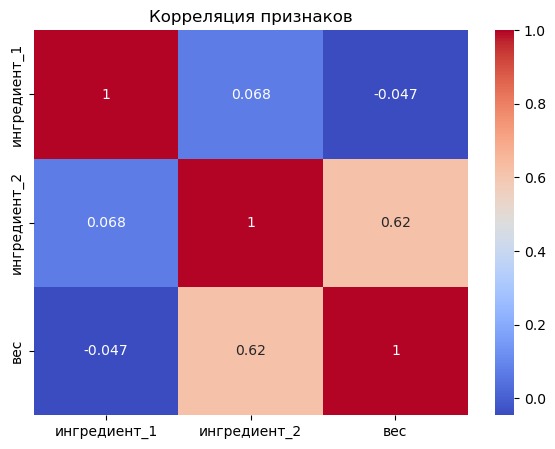

In [16]:
plt.figure(figsize=(7, 5))
plt.title('Корреляция признаков')
sns.heatmap(df[num].corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

## ОСОБЕННОСТИ ПРИМЕНЕНИЯ КОРРЕЛЯЦИИ

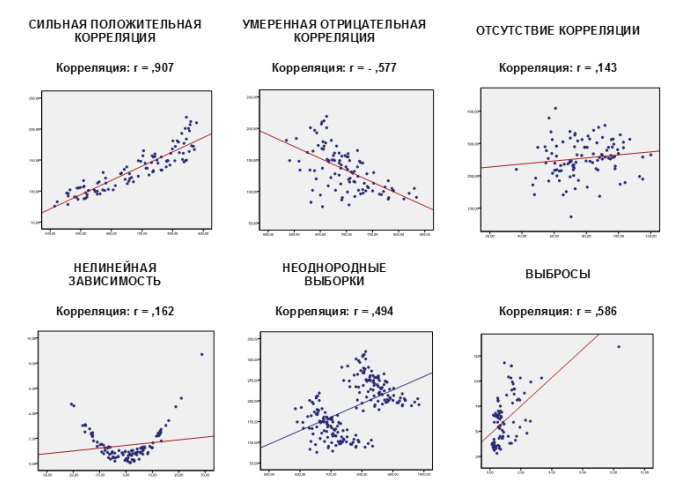

## Задача 3

1) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить - кириллица

2) Сформировать датасет из отсортированного в алфавитном порядке списка количественного фактора ингредиент_1 и качественного фактора брак.

3) Используя теорию урока, выбрать метод и рассчитать по новому датасету взаимосвязь между данными.

4) Результат вывести в виде числа с округлением до четвёртого знака.

In [39]:
df = pd.read_csv(PATH_OUT + '\\qq_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df.head(3)

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
0,61.7,2,250.9,2,1,6.3,Годен
1,58.6,2,275.7,1,2,6.7,Брак
2,53.6,2,280.6,2,1,7.5,Брак


In [40]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup - np.mean(subgroup)) ** 2)
        ssb += len(subgroup) * (np.mean(subgroup) - np.mean(values)) ** 2

    return (ssb / (ssb + ssw)) ** .5


print(correlation_ratio(df['брак'], df['ингредиент_1']).round(4))

0.5297


## Задача 4

1) Сформировать список из количественного фактора вес и качественного фактора брак
2) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить - кириллица

3) Сформировать новый датасет, используя условия отбора :
- номер_конвейера = 1
- номер_смены = 2

4) Сформировать датасет из отсортированного в алфавитном порядке списка количественного фактора вес и качественного фактора брак.
5) Используя теорию урока, выбрать метод и рассчитать по новому датасету взаимосвязь между данными в разных шкалах.

6) Результат вывести с округлением до четвёртого знака.

In [41]:
df = pd.read_csv(PATH_OUT + '\\qq_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df.head(3)

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
0,61.7,2,250.9,2,1,6.3,Годен
1,58.6,2,275.7,1,2,6.7,Брак
2,53.6,2,280.6,2,1,7.5,Брак


In [42]:
df = df[(df['новер_конвейера'] == 1) & (df['номер_смены'] == 2)]


def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup - np.mean(subgroup)) ** 2)
        ssb += len(subgroup) * (np.mean(subgroup) - np.mean(values)) ** 2

    return (ssb / (ssb + ssw)) ** .5


print(correlation_ratio(df['брак'], df['вес']).round(4))

0.1774


## Задача 5

1) Сформировать список из количественного фактора вес и качественного фактора брак.
2) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить - кириллица

4) Сформировать новый датасет, используя условия отбора:
- ингредиент_1 < 270
- номер_смены = 2


3) Сформировать датасет из списка качественных факторов: оператор_линии и брак.

4) Используя теорию урока, выбрать метод и рассчитать по новому датасету корреляцию для поиска взаимосвязи между данными в одинаковых качественных шкалах.

5) Результат вывести в виде числа, с округлением до четвёртого знака.

In [43]:
df = pd.read_csv(PATH_OUT + '\\qq_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df.head(3)

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
0,61.7,2,250.9,2,1,6.3,Годен
1,58.6,2,275.7,1,2,6.7,Брак
2,53.6,2,280.6,2,1,7.5,Брак


In [44]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df[(df['ингредиент_1'] < 270) & (df['номер_смены'] == 2)]


def my_cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * min((k - 1), (r - 1))))


print(my_cramers(df['брак'], df['оператор_линии']).round(4))

0.2829


## Задача 6

1)Загрузить файл, удалить строки с пропущенными значениями
2) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить кириллица

3) На основе фактора ингредиент 1 сформировать новый фактор ингредиент_кат, используя условия:
- если менее равно 270, то группа менее_270
- если более 270, то группа более_270

4) Сформировать новый датасет из нового фактора ингредиент_кат и качественного фактора брак
5) Используя теорию урока, выбрать метод и рассчитать по новому датасету корреляцию для поиска взаимосвязи между данными в одинаковых качественных шкалах.

6) Результат вывести в виде числа, с округлением до четвёртого знака.

In [45]:
df = pd.read_csv(PATH_OUT + '\\qq_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True)
df.head(3)

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
0,61.7,2,250.9,2,1,6.3,Годен
1,58.6,2,275.7,1,2,6.7,Брак
2,53.6,2,280.6,2,1,7.5,Брак


In [46]:
# загрузить данные

df.columns = df.columns.str.lower().str.replace(' ', '_')

df['ингредиент_кат'] = df['ингредиент_1'].apply(lambda x: 'менее_270' if x <= 270 else 'более_270')
df = df[['ингредиент_кат', 'брак']]


def my_cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * min((k - 1), (r - 1))))


print(my_cramers(df['брак'], df['ингредиент_кат']).round(4))

0.4385


## Задача 7

In [49]:
df = pd.read_csv(PATH_OUT + '\\qq0_csv.csv',sep=',', encoding='cp1251', skipinitialspace=True).dropna()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,вес,оператор_линии,ингредиент_1,номер_смены,новер_конвейера,ингредиент_2,брак
6,61.6,1,244.3,3,1,10.2,Годен
7,64.3,2,247.7,2,1,10.3,Годен
8,64.1,2,242.7,3,2,10.4,Годен
9,54.7,2,257.9,2,1,10.5,Годен
10,62.4,1,264.1,3,1,10.5,Брак
...,...,...,...,...,...,...,...
94,64.5,2,266.5,2,1,10.0,Годен
95,61.6,1,244.3,3,1,10.2,Годен
96,64.3,2,247.7,2,1,10.3,Годен
97,64.1,2,242.7,3,2,10.4,Годен


ингредиент_1


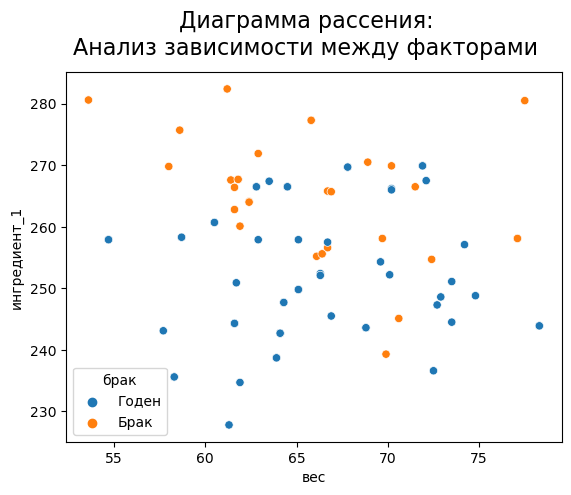

In [50]:
column = '_'.join(input().lower().split())
#df = pd.read_csv('data.csv', sep=',')
df.columns = df.columns.str.lower().str.replace(' ', '_')

sns.scatterplot(data=df, x='вес', y=column, hue='брак')
plt.suptitle('Диаграмма рассения:\nАнализ зависимости между факторами', fontsize=16, y=1.01)
plt.show()

<Figure size 900x600 with 0 Axes>

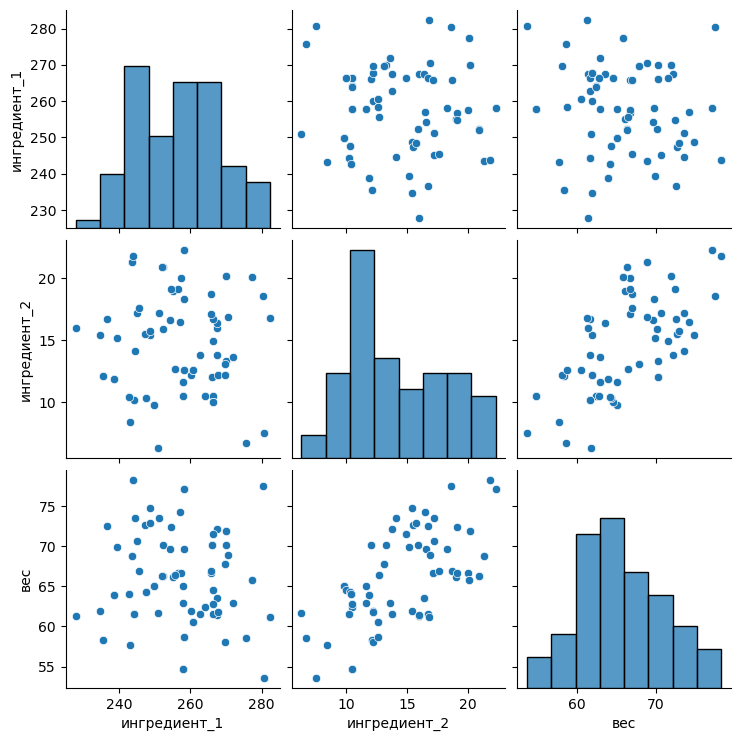

In [51]:
plt.figure(figsize=(9, 6))
sns.pairplot(df[num])
plt.show()

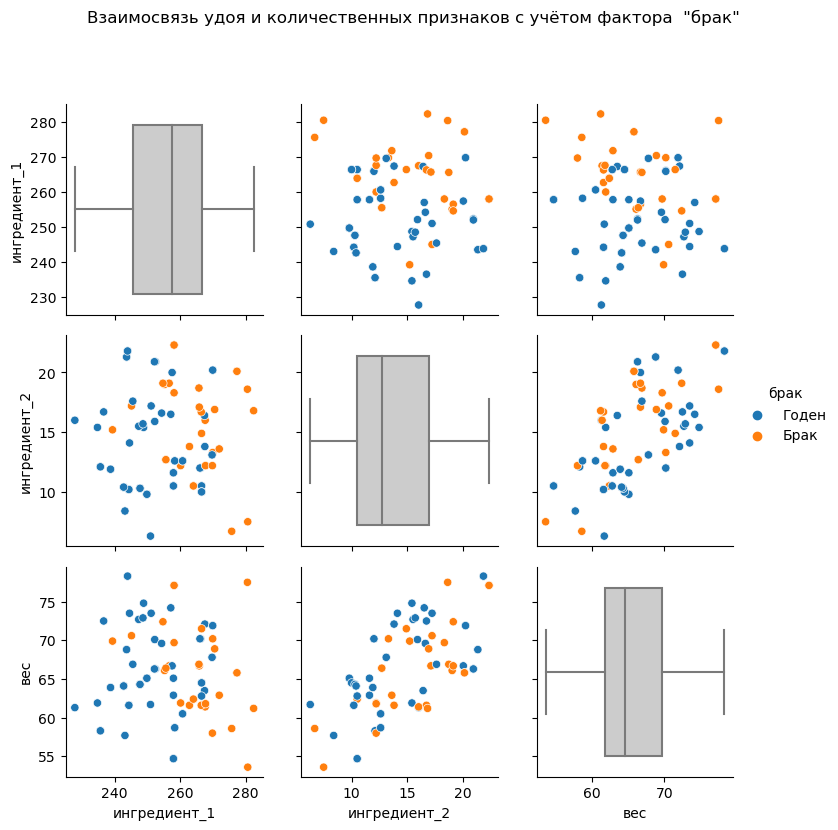

In [52]:
g = sns.PairGrid(df, hue=df['брак'].name, x_vars=df[num].columns, y_vars=df[num].columns)
g.fig.suptitle('Взаимосвязь удоя и количественных признаков с учётом фактора  ' + '"' + df['брак'].name +'"', y=1.1)
g.map_diag(sns.boxplot, color=".8")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

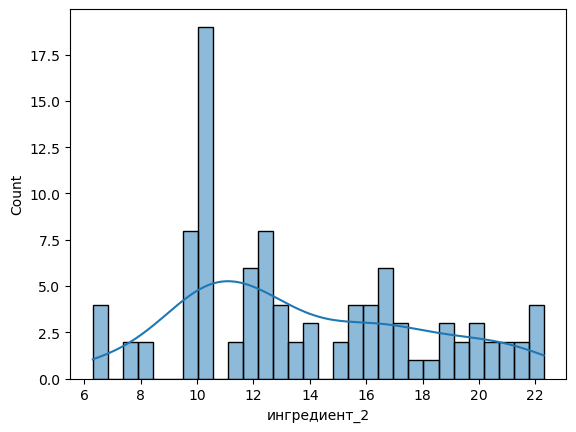

In [18]:
sns.histplot(data=df, x="ингредиент_2", bins=30, kde=True)
plt.show()

In [20]:
df1 = df[df['оператор_линии'] == 2]

In [23]:
num = ['ингредиент_1', 'ингредиент_2', 'вес']
df2 = df1[num].corr(method='pearson').style.applymap(lambda x: f"color: {'red' if (abs(x) > 0.6  and x !=1) else 'blue'}")
df2

,ингредиент_1,ингредиент_2,вес
ингредиент_1,1.000000,-0.117507,-0.087829
ингредиент_2,-0.117507,1.000000,0.710481
вес,-0.087829,0.710481,1.000000


In [ ]:
# Напишем функцию для первичной проверки данных
def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    #print(data_df.shape)
        
    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())
        
    ## Посмотрим на сами данные
    print ('\033[1m' + '\nПервые пять строк датасета'+ '\033[0m')
    display(data_df.head(2)) #tail()
    
    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    display(data_df.describe().T)
    
    print('\033[1m' + '\nОписание категориальных данных:'+ '\033[0m')
    display(data_df.describe(include='object').T) 
    
    
    print('\033[1m' + '\nВывод уникальных значений по каждому категориаьному признаку:'+ '\033[0m')    
    df_object = data_df.select_dtypes(include='object').columns
    
    for i in df_object:
        print('\033[1m' + '_'+ str(i) + '\033[0m')
        display(data_df[i].value_counts())

In [ ]:
def cat_graph(df, cat_feat):
    '''
    Функция отрисовки круговых диаграмм для категориальных переменных.
    На вход: исходная таблица и список категориальных переменных.
    На выходе: графики
    '''
    
    params = {'axes.labelsize' : 12, 'figure.titlesize': 12,
              'xtick.labelsize': 12, 'ytick.labelsize': 12
             }
    plt.rcParams.update(params)
        
    cols = 2
    rows = int(np.ceil(len(cat_feat) / cols))

    fig, axs = plt.subplots(rows, cols, figsize = (8,8))
    plt.tight_layout()

    try:
        count = -1
        for i in range(rows):
            for x in range(cols):
                count+=1
                col = cat_feat[count]
                df1 = pd.DataFrame(df.groupby([col])[col].count())
                axs[i,x].pie(x=df1[col],
                             labels=df1.index, 
                             autopct='%1.1f%%',)
                axs[i,x].title.set_text(str(col))
    except IndexError:
        pass

    plt.suptitle('Круговые диаграммы категориальных признаков', fontsize=18, y=1.05)

    plt.show()

In [ ]:
def plot_hist(data, col_column):
    '''
    Функция отрисовки гистограмм и ящика с усами для количесвтенных переменных.
    На вход: исходная таблица и список количественных переменных.
    На выходе: графики
    '''
    rows = len(col_column)
    f, ax = plt.subplots(rows,2, figsize=(8, 15))
    f.tight_layout()
    f.set_figheight(30)
    f.set_figwidth(14)
    plt.rcParams.update({'font.size': 18})
    
    for i, col in enumerate(col_column):         
        sns.histplot(data[col], kde=True, bins=24, ax = ax[i, 0])                    
        sns.boxplot(data[col], ax = ax[i, 1])

        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel('Количество')
    plt.suptitle("Гистограмма и ящик с усами для количесвтенных данных", fontsize=22, y=1.01)
    plt.show()